In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## 1. Data Cleaning

In [18]:
# Load csv and drop duplicates
df1_train = pd.read_csv('train.csv')
df1_test = pd.read_csv('test.csv')
df1_train.drop_duplicates()
df1_test.drop_duplicates()

id     Name  Gender   Age           City  \
0      140700   Shivam    Male  53.0  Visakhapatnam   
1      140701    Sanya  Female  58.0        Kolkata   
2      140702     Yash    Male  53.0         Jaipur   
3      140703   Nalini  Female  23.0         Rajkot   
4      140704  Shaurya    Male  47.0         Kalyan   
...       ...      ...     ...   ...            ...   
93795  234495     Zoya  Female  49.0         Jaipur   
93796  234496    Shlok    Male  29.0      Ahmedabad   
93797  234497    Rishi    Male  24.0  Visakhapatnam   
93798  234498   Eshita  Female  23.0         Kalyan   
93799  234499    Gauri  Female  43.0       Varanasi   

      Working Professional or Student              Profession  \
0                Working Professional                   Judge   
1                Working Professional  Educational Consultant   
2                Working Professional                 Teacher   
3                             Student                     NaN   
4                Working Professional                 Teacher   
...                               ...                     ...   
93795            Working Professional                   Pilot   
93796            Working Professional                   Pilot   
93797                         Student                     NaN   
93798            Working Professional       Marketing Manager   
93799            Working Professional  Educational Consultant   

       Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0                    NaN            2.0   NaN                 NaN   
1                    NaN            2.0   NaN                 NaN   
2                    NaN            4.0   NaN                 NaN   
3                    5.0            NaN  6.84                 1.0   
4                    NaN            5.0   NaN                 NaN   
...                  ...            ...   ...                 ...   
93795                NaN            3.0   NaN                 NaN   
93796                NaN            5.0   NaN                 NaN   
93797                1.0            NaN  7.51                 4.0   
93798                NaN            4.0   NaN                 NaN   
93799                NaN            5.0   NaN                 NaN   

       Job Satisfaction     Sleep Duration Dietary Habits  Degree  \
0                   5.0  Less than 5 hours       Moderate     LLB   
1                   4.0  Less than 5 hours       Moderate    B.Ed   
2                   1.0          7-8 hours       Moderate  B.Arch   
3                   NaN  More than 8 hours       Moderate     BSc   
4                   5.0          7-8 hours       Moderate     BCA   
...                 ...                ...            ...     ...   
93795               5.0  Less than 5 hours       Moderate     BSc   
93796               1.0          7-8 hours       Moderate      BE   
93797               NaN          7-8 hours       Moderate  B.Tech   
93798               2.0          5-6 hours        Healthy      BA   
93799               2.0  More than 8 hours        Healthy    B.Ed   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                        No               9.0   
1                                        No               6.0   
2                                       Yes              12.0   
3                                       Yes              10.0   
4                                       Yes               3.0   
...                                     ...               ...   
93795                                   Yes               2.0   
93796                                   Yes              11.0   
93797                                    No               7.0   
93798                                   Yes               7.0   
93799                                    No              11.0   

       Financial Stress Family History of Mental Illness  
0                   3.0                              Yes  
1           

In [20]:
# Check the amount of na value
df1_train.isna().sum().reset_index(name='count')

index   count
0                                      id       0
1                                    Name       0
2                                  Gender       0
3                                     Age       0
4                                    City       0
5         Working Professional or Student       0
6                              Profession   36630
7                       Academic Pressure  112803
8                           Work Pressure   27918
9                                    CGPA  112802
10                     Study Satisfaction  112803
11                       Job Satisfaction   27910
12                         Sleep Duration       0
13                         Dietary Habits       4
14                                 Degree       2
15  Have you ever had suicidal thoughts ?       0
16                       Work/Study Hours       0
17                       Financial Stress       4
18       Family History of Mental Illness       0
19                             Depression       0

In [22]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [24]:
# Process interval and ordinal variables
List_fill_na1 = ['Academic Pressure','Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']
List_fill_na2 = ['CGPA']
for each in List_fill_na1:
    df1_train.fillna(df1_train[each].mode()[0], inplace=True)
for each in List_fill_na2:
    df1_train.fillna(df1_train[each].mean(), inplace=True)
    df1_train.isnull().sum()
    
for each in List_fill_na1:
    df1_test.fillna(df1_test[each].mode()[0], inplace=True)
for each in List_fill_na2:
    df1_test.fillna(df1_test[each].mean(), inplace=True)
    df1_test.isnull().sum()

In [26]:
# check the values under every index, except id, name, age, gender, city, Working conditions, Profession
for each in df1_train.columns[7:]:
    print(f'{each}: {df1_train[each].unique()}')

Academic Pressure: [3. 5. 2. 4. 1.]
Work Pressure: [5. 4. 3. 1. 2.]
CGPA: [ 3.      8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04
  9.79    8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25
  7.83    9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74
  9.86    6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99
  5.24    9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71
  7.87    5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09
  9.82    8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64
  5.27    6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88
  5.32    6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79
  9.95    5.37    6.86    8.32    9.74    5.66    7.48    8.23    8.81
  6.03    5.56    5.68    5.14    7.61    6.17    8.17    9.87    8.75
  6.16    9.5     7.99    5.67    8.92    6.19    5.76    6.25    5.11
  5.58    5.65    9.89    8.03    6.61    9.41    8.64    7.21    8.28
  6

In [28]:
# Dietary Habits data has to be normalized
df1_train_DH = df1_train.groupby('Dietary Habits').size().reset_index(name='count')
print(df1_train_DH)
# So we can divide the 'Dietary Habits' into 4 groups: Healthy, Moderate, Unhealthy, Other
def categorize_DH(habit):
    if habit in ['More Healthy', 'Healthy']:
        return 'Healthy'
    elif habit in ['Moderate']:
        return 'Moderate'
    elif habit in ['Unhealthy', 'No Healthy']:
        return 'Unhealthy'
    else:
        return 'Other'
    
df1_train['Dietary Habits'] = df1_train['Dietary Habits'].apply(categorize_DH)
df1_test['Dietary Habits'] = df1_test['Dietary Habits'].apply(categorize_DH)

       Dietary Habits  count
0                 3.0      4
1                 1.0      1
2                   2      1
3                   3      1
4                 BSc      1
5            Class 12      1
6         Electrician      1
7              Gender      1
8             Healthy  44741
9            Hormonal      1
10             Indoor      1
11       Less Healthy      1
12  Less than Healthy      1
13             M.Tech      1
14               Male      1
15              Mihir      1
16           Moderate  49705
17       More Healthy      2
18                 No      2
19         No Healthy      1
20            Pratham      1
21          Unhealthy  46227
22              Vegas      1
23                Yes      2


In [30]:
# Same logic is used to normalize sleep duration
def categorize_SD(duration):
    if duration in ['Less than 5 hours', '1-2 hours', '2-3 hours', '3-4 hours', '4-5 hours']:
        return 'Less than 5 hours'
    elif duration in ['5-6 hours', '4-6 hours', '6-7 hours']:
        return '5-6 hours'
    elif duration in ['7-8 hours', '6-8 hours', '8 hours']:
        return '7-8 hours'
    elif duration in ['More than 8 hours', '8-9 hours', '9-11 hours', '10-11 hours']:
        return 'More than 8 hours'
    else:
        return 'Other'
    
df1_train['Sleep Duration'] = df1_train['Sleep Duration'].apply(categorize_SD)
df1_test['Sleep Duration'] = df1_test['Sleep Duration'].apply(categorize_SD)

In [32]:
# Ensuring the wrong data are categorized 'Other' classes
for each in df1_train.columns[7:]:
    print(f'{each}: {df1_train[each].unique()}')

Academic Pressure: [3. 5. 2. 4. 1.]
Work Pressure: [5. 4. 3. 1. 2.]
CGPA: [ 3.      8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04
  9.79    8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25
  7.83    9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74
  9.86    6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99
  5.24    9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71
  7.87    5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09
  9.82    8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64
  5.27    6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88
  5.32    6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79
  9.95    5.37    6.86    8.32    9.74    5.66    7.48    8.23    8.81
  6.03    5.56    5.68    5.14    7.61    6.17    8.17    9.87    8.75
  6.16    9.5     7.99    5.67    8.92    6.19    5.76    6.25    5.11
  5.58    5.65    9.89    8.03    6.61    9.41    8.64    7.21    8.28
  6

In [34]:
# Working or not actually has influence on the variables using for analysis
# So, I firstly split the whole data into two sectors according to their working conditions
df1_stu_train = df1_train[df1_train['Working Professional or Student'] == 'Student']
df1_worker_train = df1_train[df1_train['Working Professional or Student'] == 'Working Professional']

#### Because we plan to separate the original dataset into two part: workers and students, and try to accomplish the predictions according to their professional or academic conditions, so we process the whole data set simultaneously before we split it.

# 2. Data Explorations


In [216]:
def hist(datasource, bins=10, title="Histogram", xlabel="Values", ylabel="Frequency"):
    plt.figure(figsize=(10, 6))
    sns.histplot(datasource, bins=bins, kde=True, color='skyblue', edgecolor='black')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    sns.despine()
    plt.savefig(f'{title}_histogram.png')
    plt.show()

def pie(data, labels, title="Pie Chart", colors=None):
    if colors is None:
        colors = sns.color_palette("pastel")
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        data.to_numpy(),
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'w'}
    )
    for text in texts:
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
    plt.title(title, fontsize=16)
    plt.savefig(f'{title}_piechart.png')
    plt.show()
    
def scatter(x, y, title="Scatter Plot", xlabel="X-axis", ylabel="Y-axis"):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, s=100, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    sns.despine()
    plt.show()

## 2.1 Exlorations in Student Group

In [219]:
print(df1_stu_train.columns)

Index(['Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')


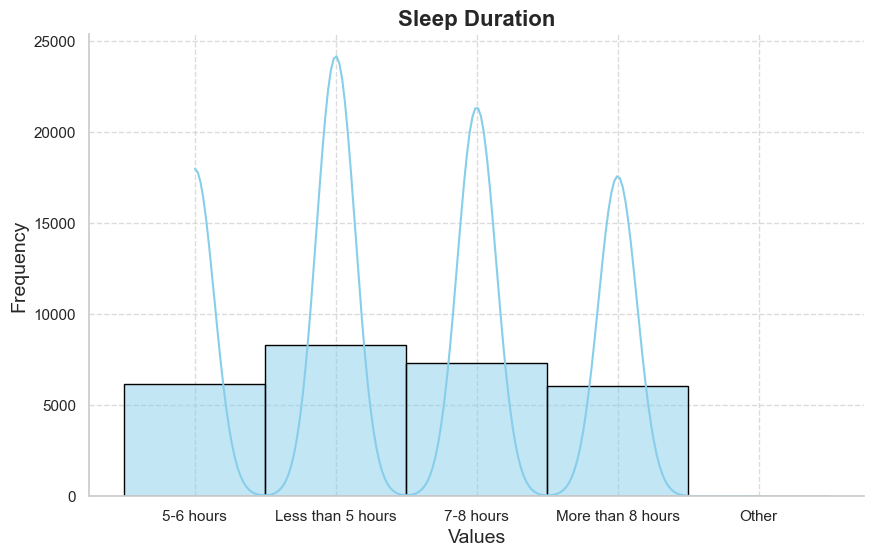

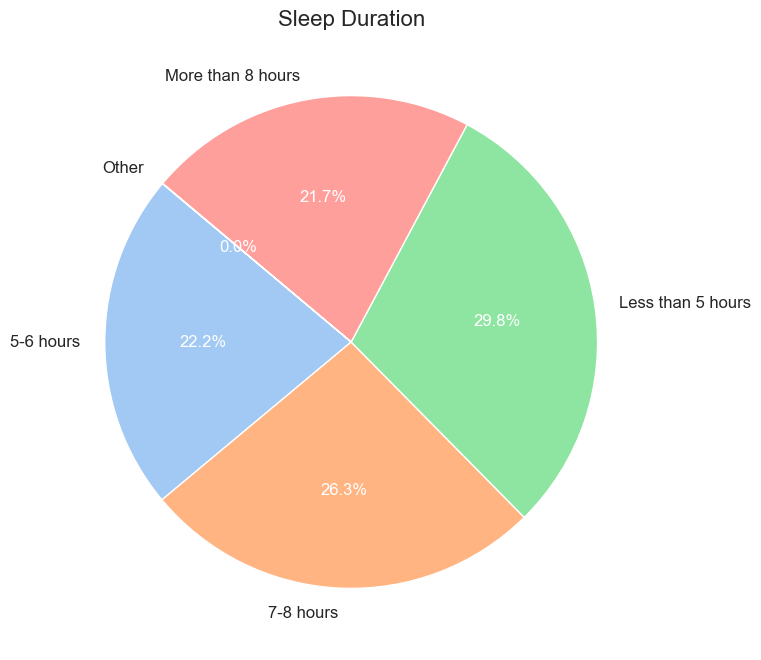

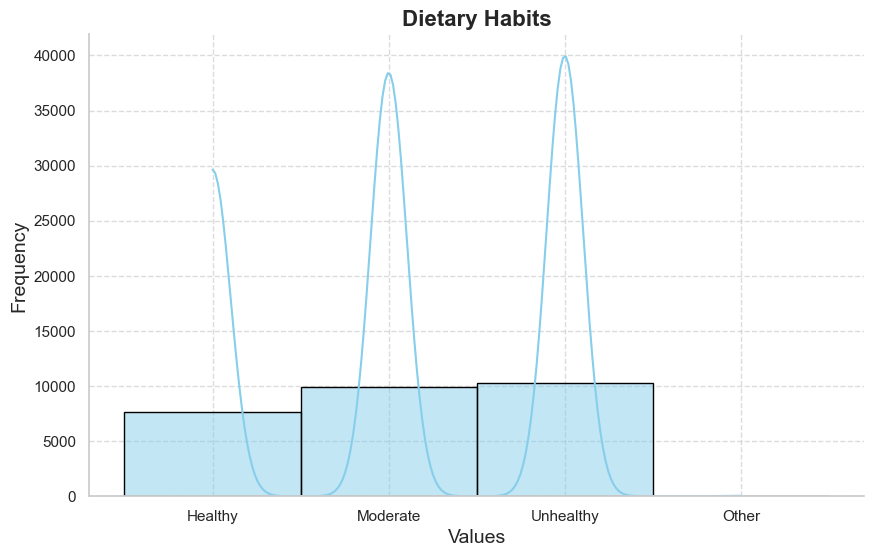

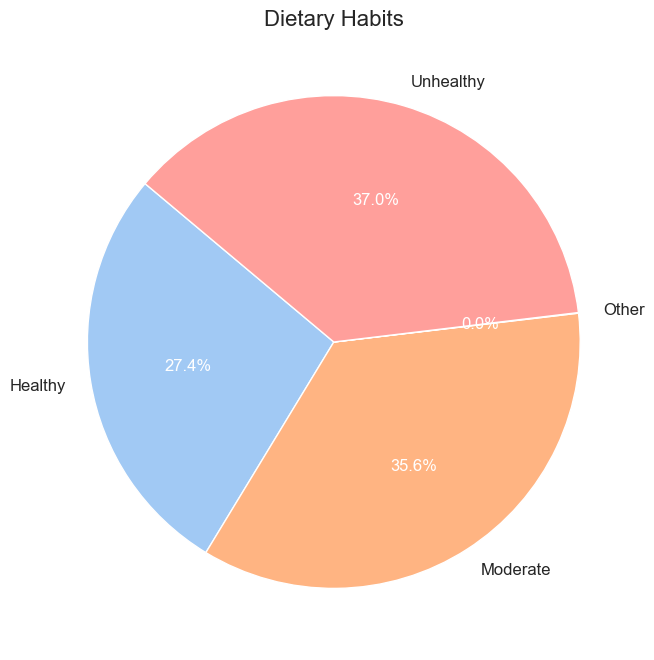

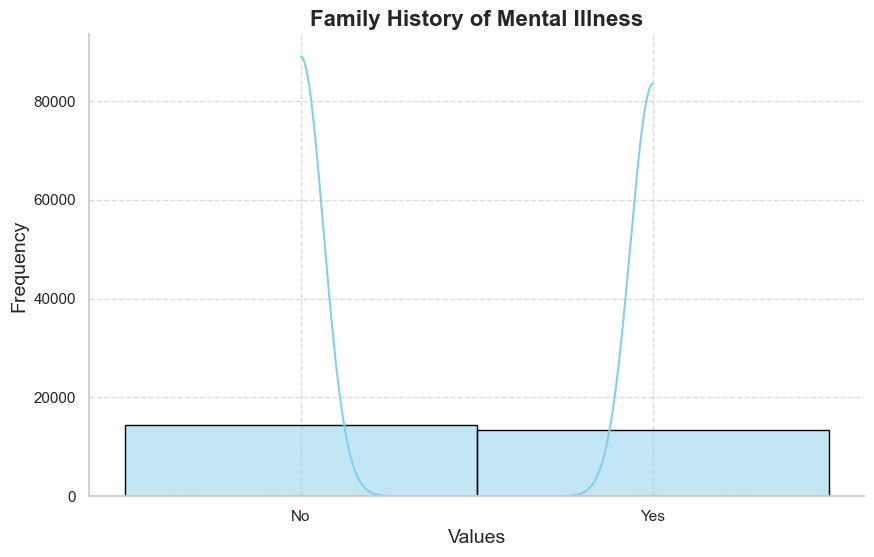

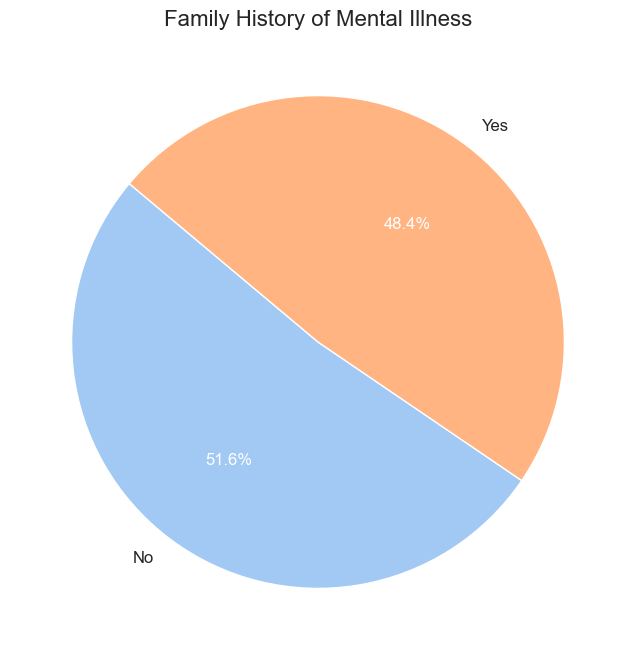

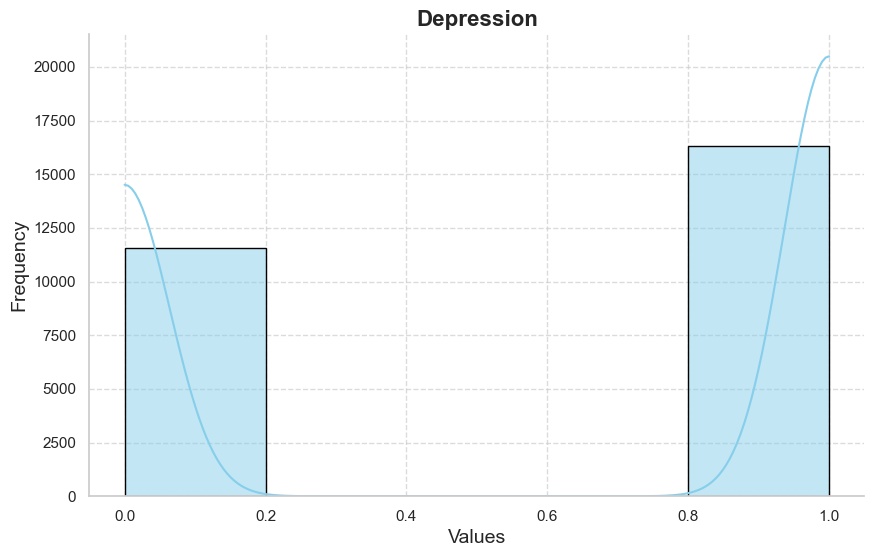

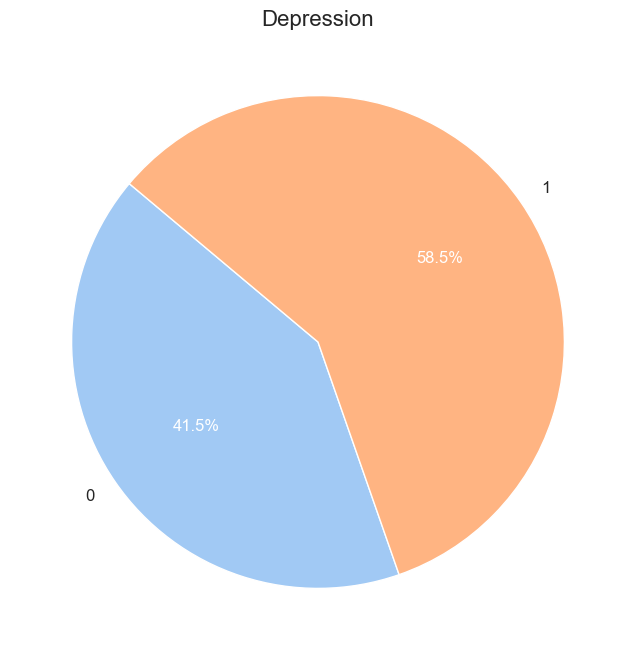

In [221]:
# Histograms
List_his1 = ['Sleep Duration', 'Dietary Habits', 'Family History of Mental Illness', 'Depression']
for each in List_his1:
    hist(df1_stu_train[each],bins=5,title=each)
    df2_each = df1_stu_train.groupby(each).size().reset_index(name='count')
    pie(df2_each['count'], df2_each[each], title=each, colors=None)


### 2.1.2 Age trend for interval variables
#### - According to the correlation matrix given below, interval variables are independent with each other to some extent.
#### - Academic pressure, CGPA, study satisfaction, work/study hours, and financial stress show a stable age trend.

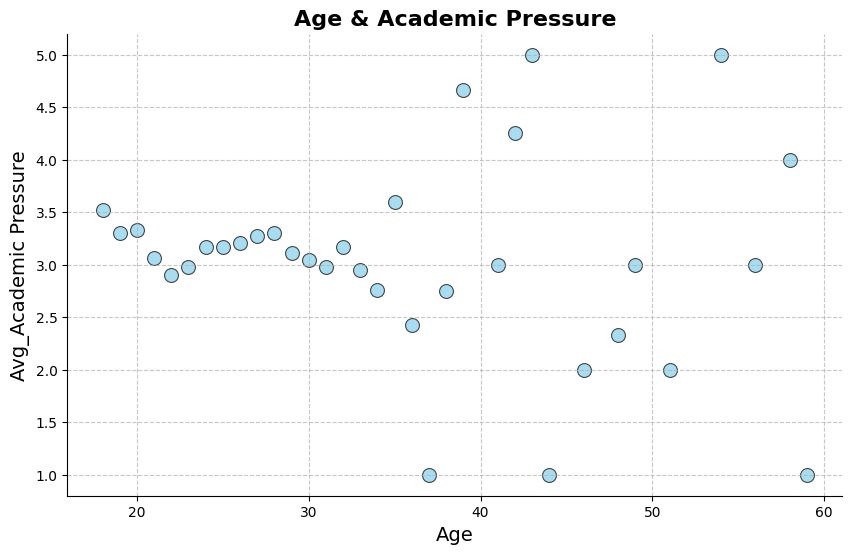

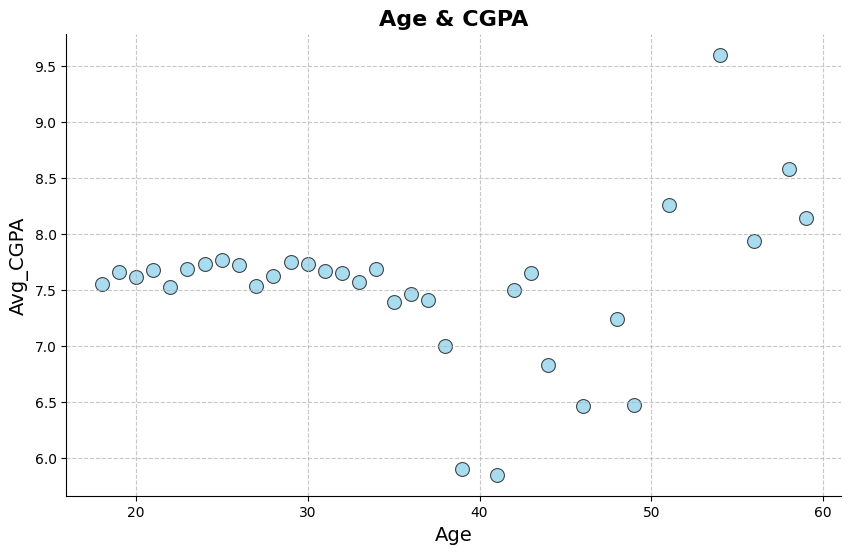

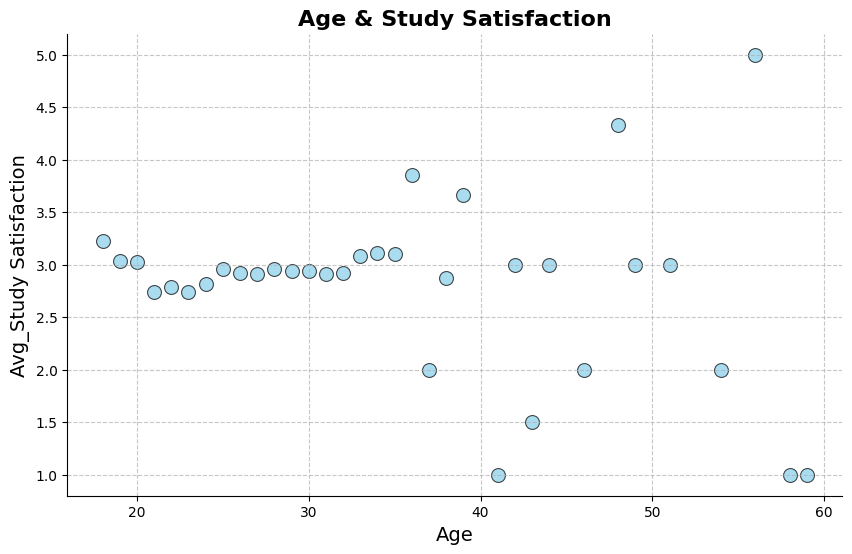

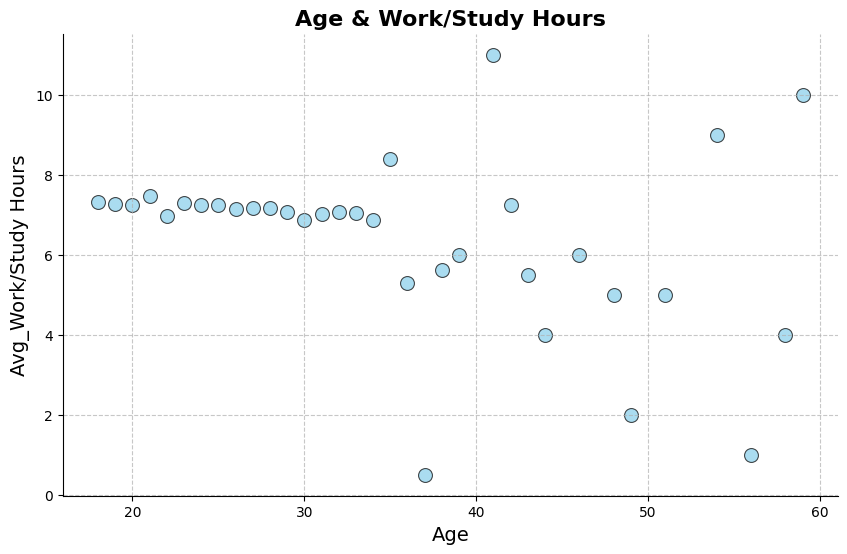

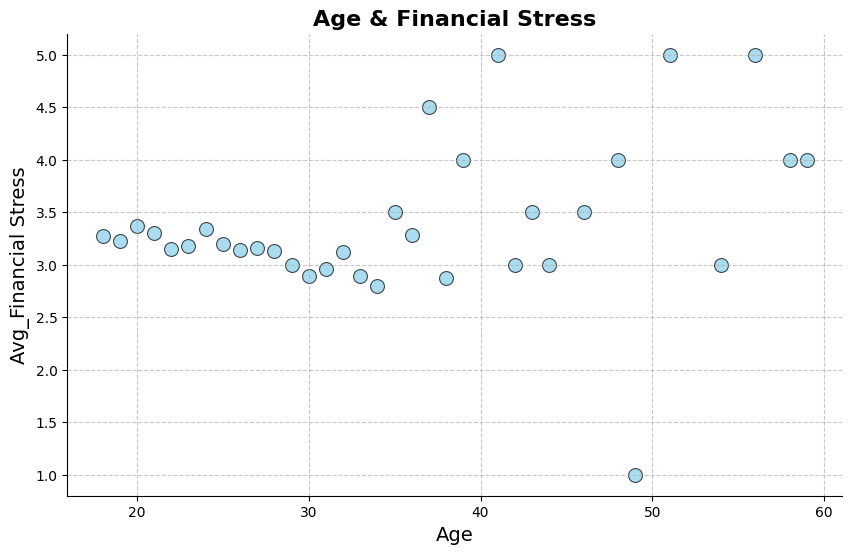

In [45]:
# Scatter plots
List_scatter1 = ['Academic Pressure', 'CGPA', 'Study Satisfaction','Work/Study Hours', 'Financial Stress']

for each in List_scatter1:
    df2_each = df1_stu_train.groupby('Age')[each].mean().reset_index(name=f'Avg_{each}')
    scatter(df2_each['Age'],df2_each[f'Avg_{each}'],title = f"Age & {each}", xlabel = 'Age', ylabel = f'Avg_{each}')

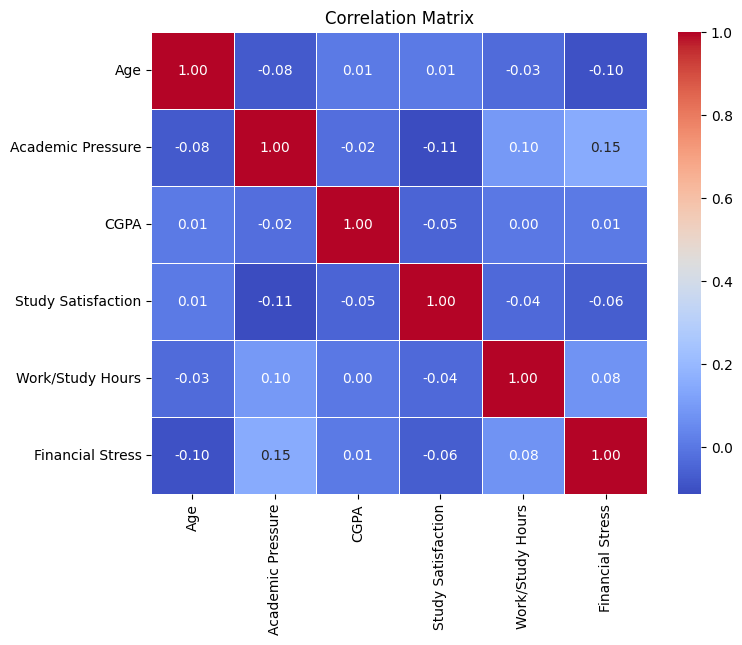

In [47]:
# Because the samples over 34 year-old are far less than those under 34-year-old, so we plan to only choose samples under 34-year-old to reveal the relations between variables and age.
# 'Academic Pressure', 'CGPA', 'Study Satisfaction','Work/Study Hours', 'Financial Stress'
raw_data = df1_stu_train[df1_stu_train['Age'] <= 34]
data = {
    'Age' : list(raw_data['Age']),
    'Academic Pressure' : list(raw_data['Academic Pressure']),
    'CGPA' : list(raw_data['CGPA']),
    'Study Satisfaction' : list(raw_data['Study Satisfaction']),
    'Work/Study Hours' : list(raw_data['Work/Study Hours']),
    'Financial Stress' : list(raw_data['Financial Stress'])
}

df_corr = pd.DataFrame(data)
corr_relation = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_relation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 2.1.3 Variables performance in having depression or not
#### - Depressed students always have greater academic pressure, study hours, and financial stress, while the CGPA, study satisfaction shows no difference compared to healthy ones.
#### - To some extent, depressed students have spent more study hours but have gained a not-differentiated grade. There study seems to be inefficient.

/var/folders/g4/mb4r6s4s1djcqrg48p_619x80000gn/T/ipykernel_61339/2246082493.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y=each, data=df, palette='pastel', width=0.6)
/var/folders/g4/mb4r6s4s1djcqrg48p_619x80000gn/T/ipykernel_61339/2246082493.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y=each, data=df, palette='pastel', width=0.6)
/var/folders/g4/mb4r6s4s1djcqrg48p_619x80000gn/T/ipykernel_61339/2246082493.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y=each, data=df, pal

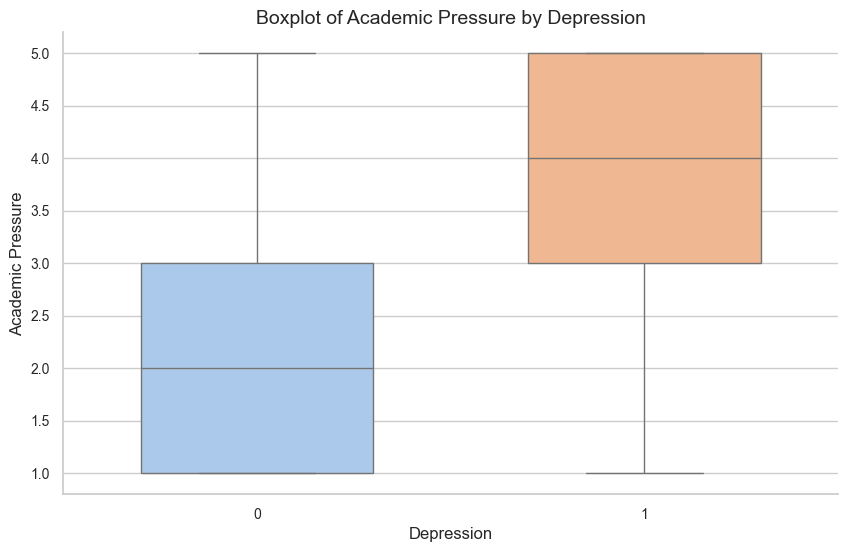

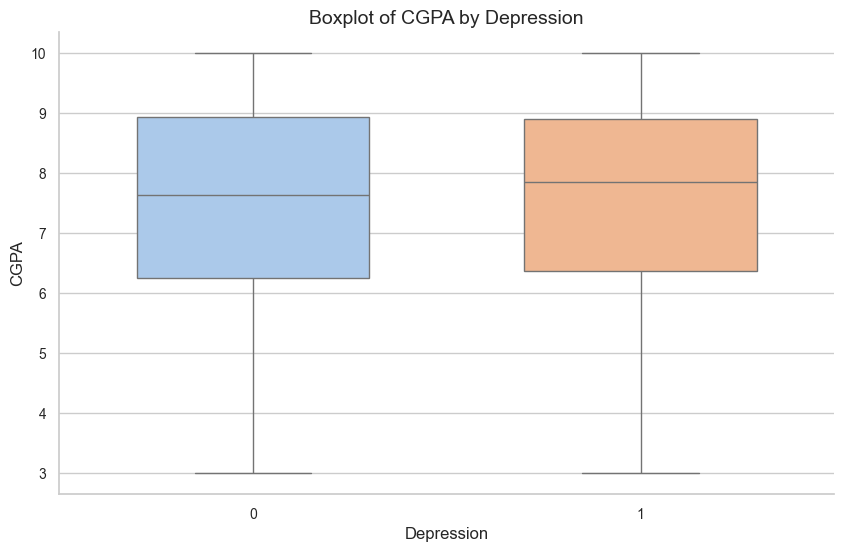

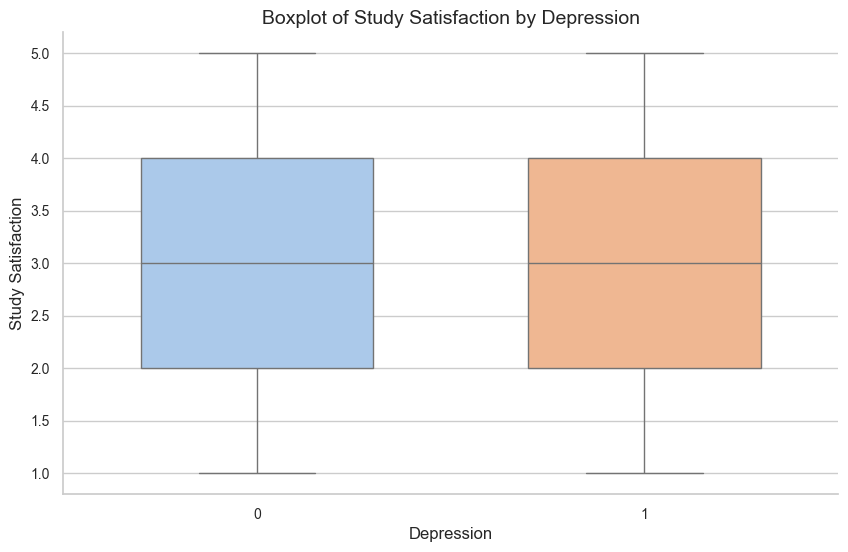

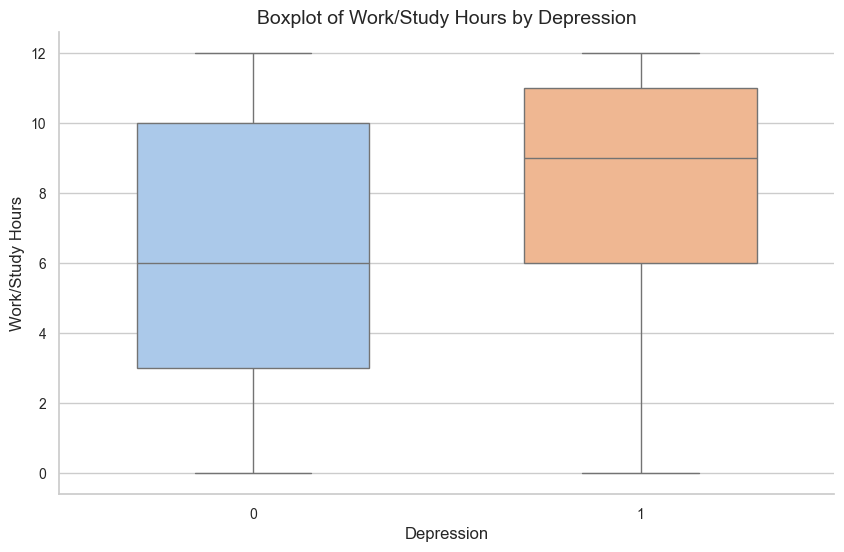

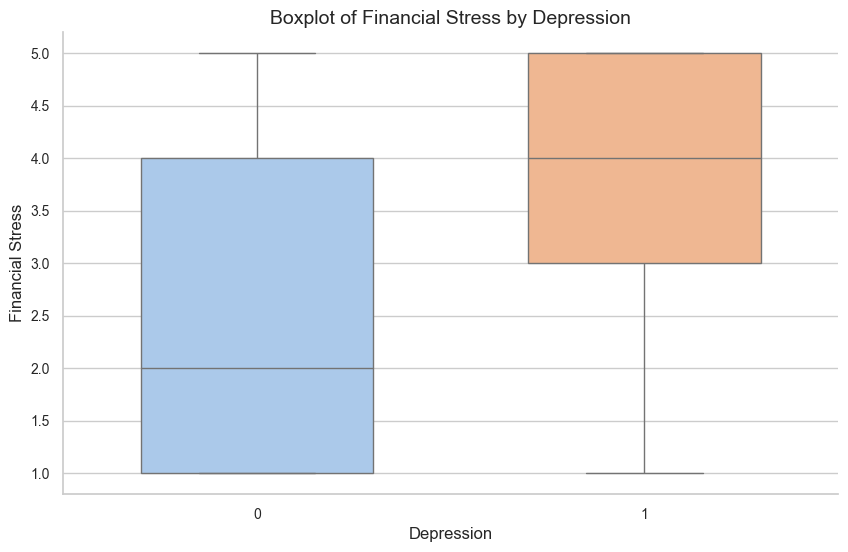

In [51]:
sns.set(style="whitegrid")

List_box1 = ['Academic Pressure', 'CGPA', 'Study Satisfaction','Work/Study Hours', 'Financial Stress']

for each in List_box1:
    data = {
        each: list(df1_stu_train[each]),
        'Depression': list(df1_stu_train['Depression'])
    }
    df = pd.DataFrame(data)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Depression', y=each, data=df, palette='pastel', width=0.6)

    plt.title(f'Boxplot of {each} by Depression', fontsize=14)
    plt.xlabel('Depression', fontsize=12)
    plt.ylabel(each, fontsize=12)
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    sns.despine()

## 2.2 Exlorations in Worker Group

In [54]:
print(df1_worker_train.columns)

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


### 2.2.1 Distributions for categorical variables
#### - Sleep Duration: The proportion of sleeping over 7 hours shares the same percentage (50.0%) with that of sleeping less than 7 hours.
#### - Dietary Habits: The proportion of having unhealthy dietary habits is lowest (31.8%), showing workers pay more attentions to healthy diets.
#### - Family History of Mental Illness: The percentage of having family mental illness history or not is the same (50.0%).
#### - Depression: Surprisingly, less than 10% (8.2%) of the samples are encountering depression. It's what we need to focus on.

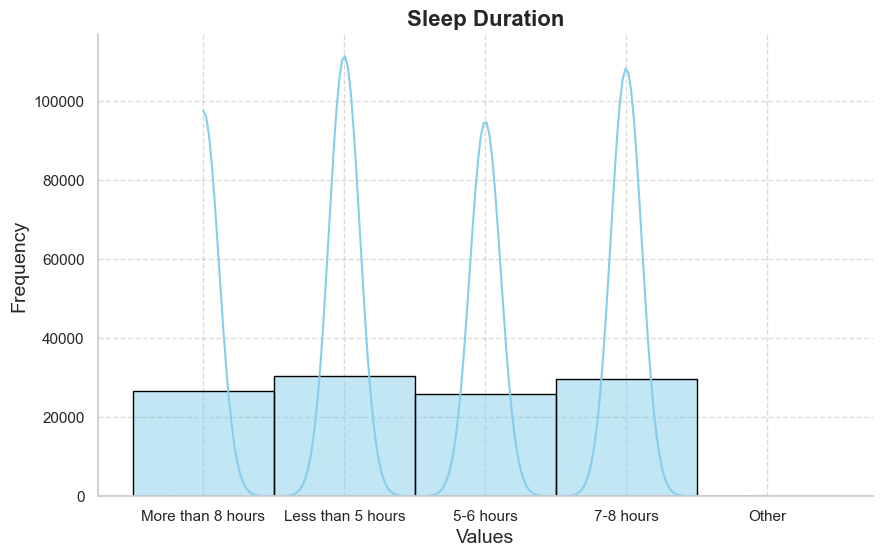

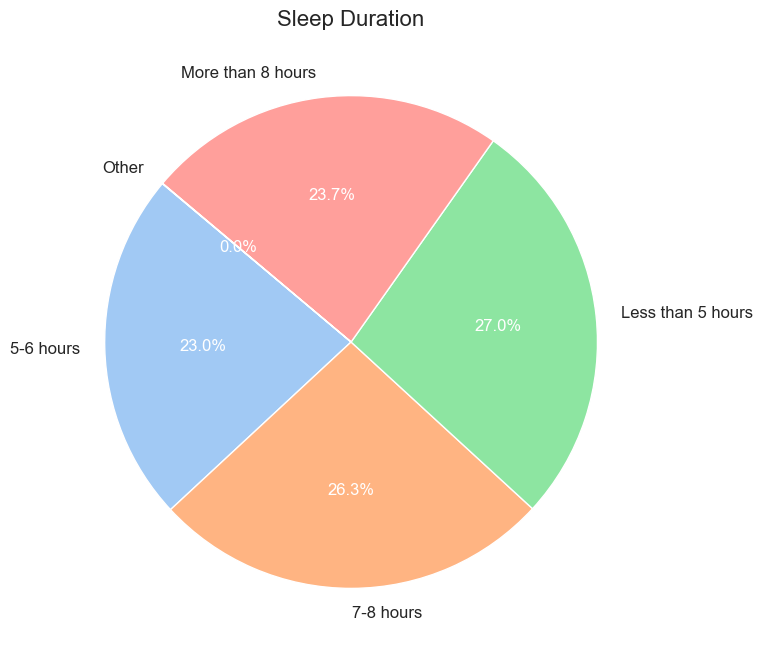

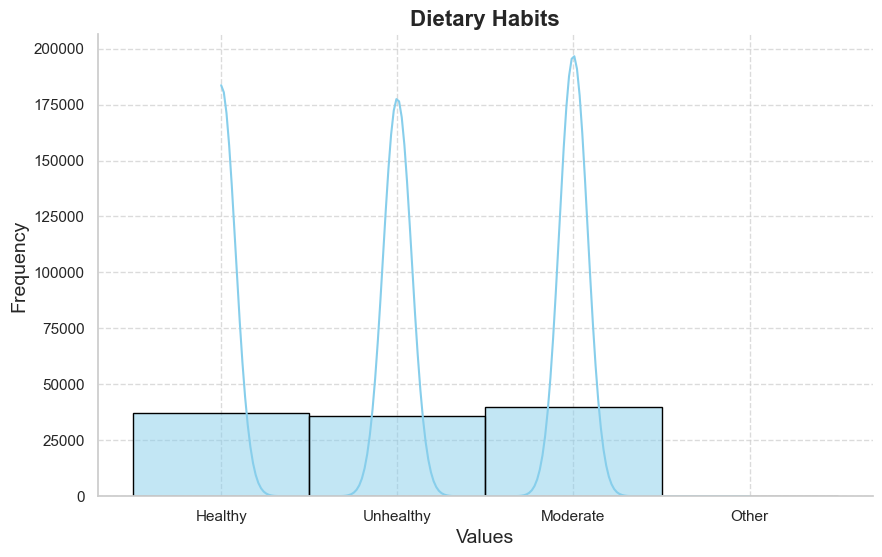

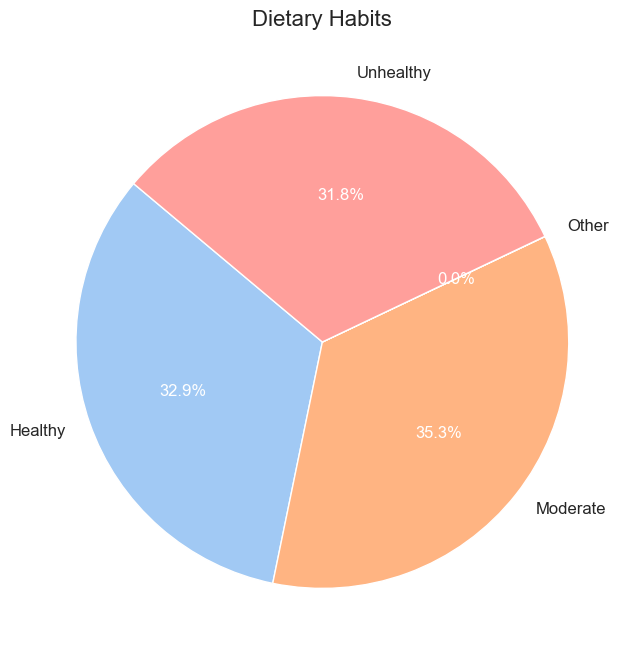

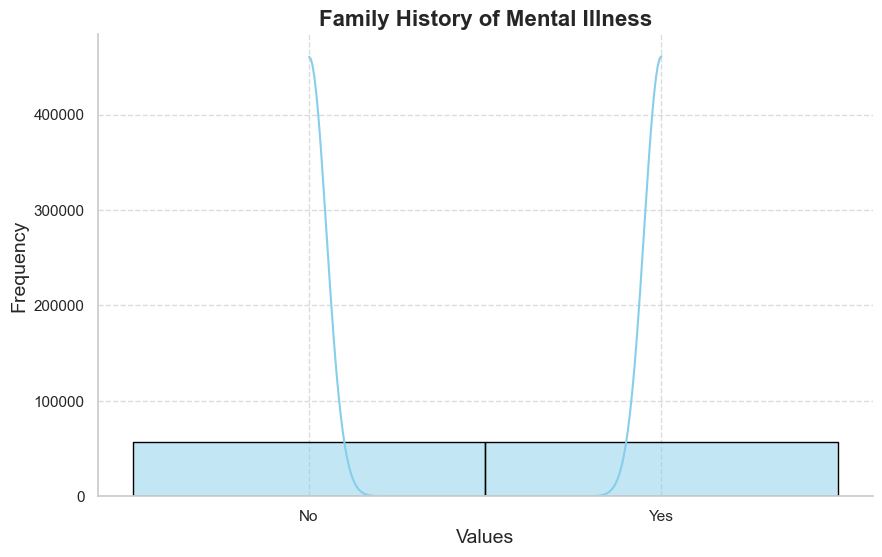

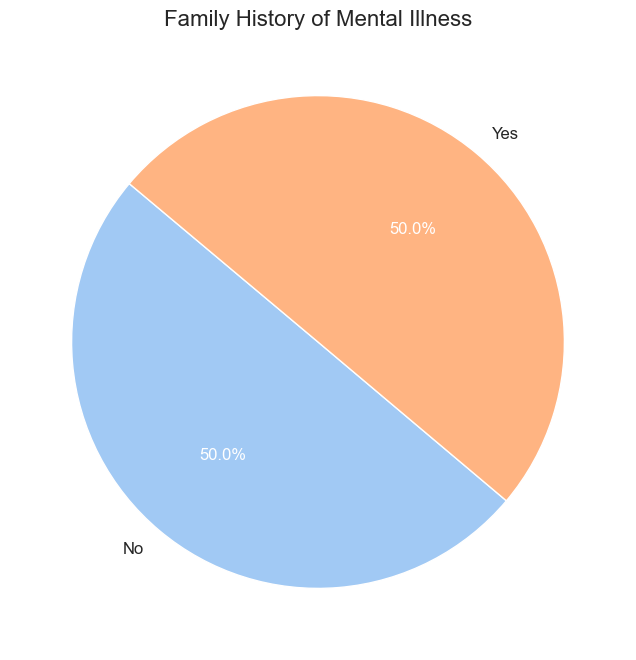

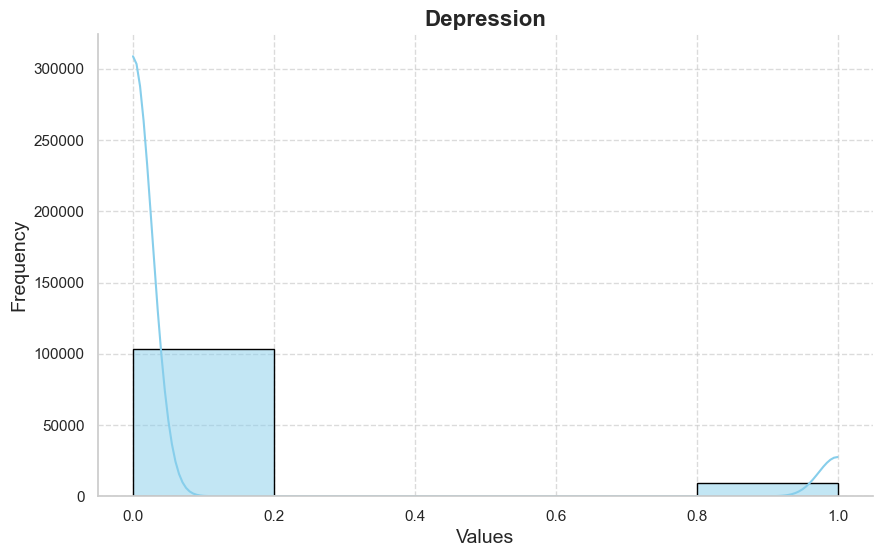

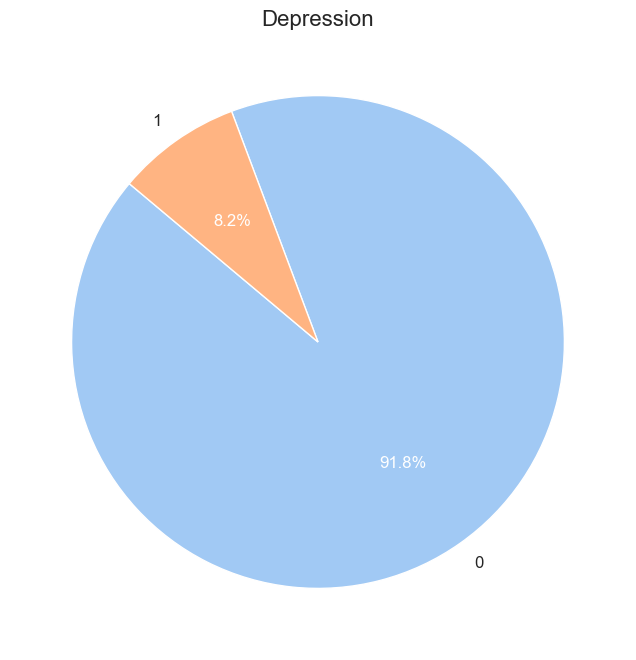

In [223]:
List_his2 = ['Sleep Duration', 'Dietary Habits', 'Family History of Mental Illness', 'Depression']
for each in List_his2:
    hist(df1_worker_train[each],bins=5,title=each)
    df2_each = df1_worker_train.groupby(each).size().reset_index(name='count')
    pie(df2_each['count'], df2_each[each], title=each, colors=None)

### 2.2.2 Age trend for interval variables
#### - According to the scatter charts given, work pressure, work hours, and financial stress show declining trend until about 38-year-old, then showing a stable trend.
#### - What's more, job satisfaction shows an ascending trend and stops growing after 40-year-old.
#### - These trends are consistence with social consensus.

In [59]:
print(df1_worker_train.groupby('Age').size().reset_index(name='count'))

     Age  count
0   18.0   2334
1   19.0   1074
2   20.0   1278
3   21.0   1016
4   22.0    906
5   23.0   1255
6   24.0   1097
7   25.0   1147
8   26.0    953
9   27.0   1151
10  28.0   1205
11  29.0   1147
12  30.0    767
13  31.0   1133
14  32.0    523
15  33.0   1247
16  34.0   1110
17  35.0   2824
18  36.0   2696
19  37.0   2722
20  38.0   4556
21  39.0   3259
22  40.0   3094
23  41.0   3139
24  42.0   3389
25  43.0   3854
26  44.0   3216
27  45.0   3535
28  46.0   4078
29  47.0   4199
30  48.0   3692
31  49.0   5098
32  50.0   3439
33  51.0   3926
34  52.0   2589
35  53.0   4526
36  54.0   3927
37  55.0   2846
38  56.0   5245
39  57.0   4395
40  58.0   2931
41  59.0   3780
42  60.0   2501


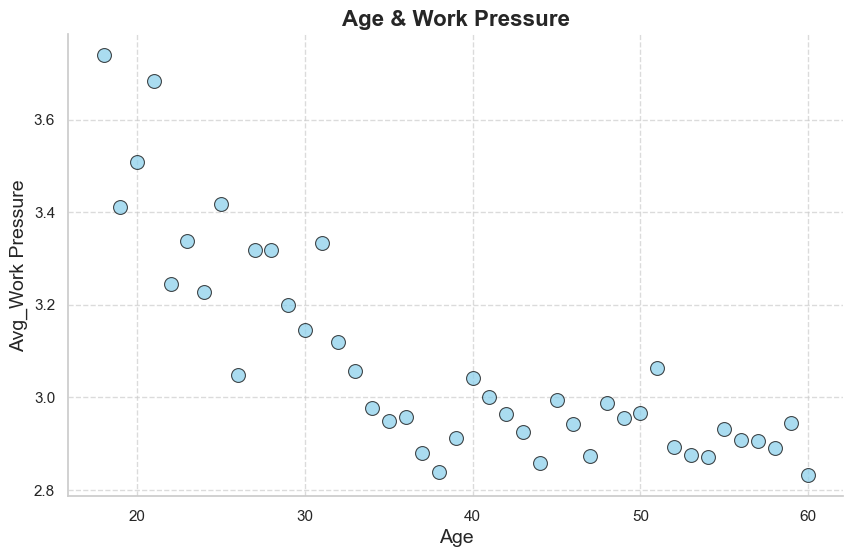

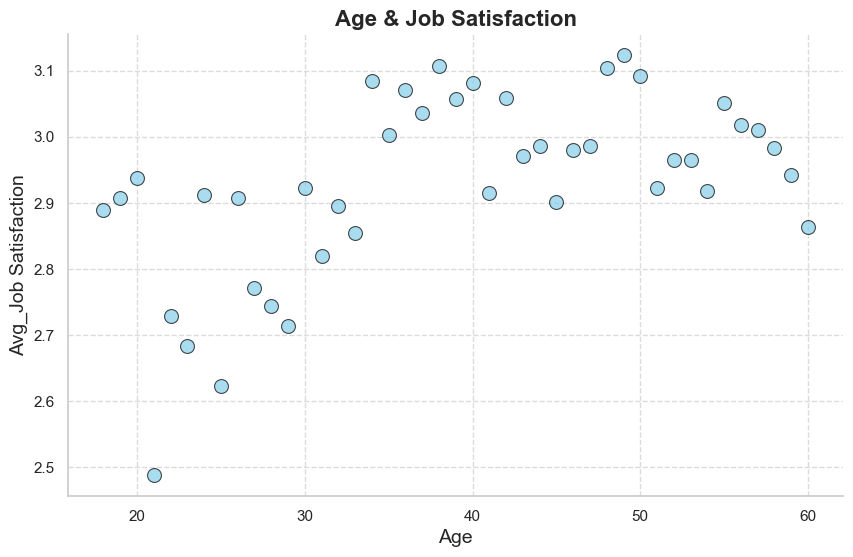

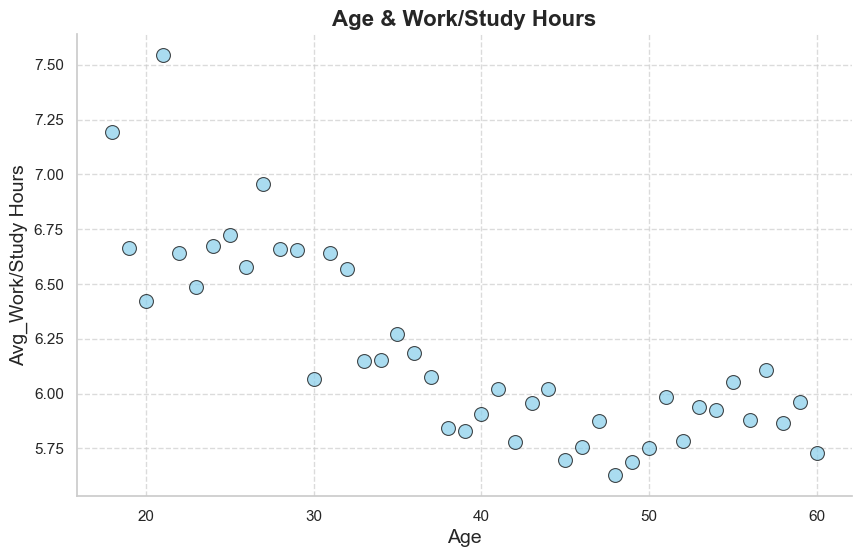

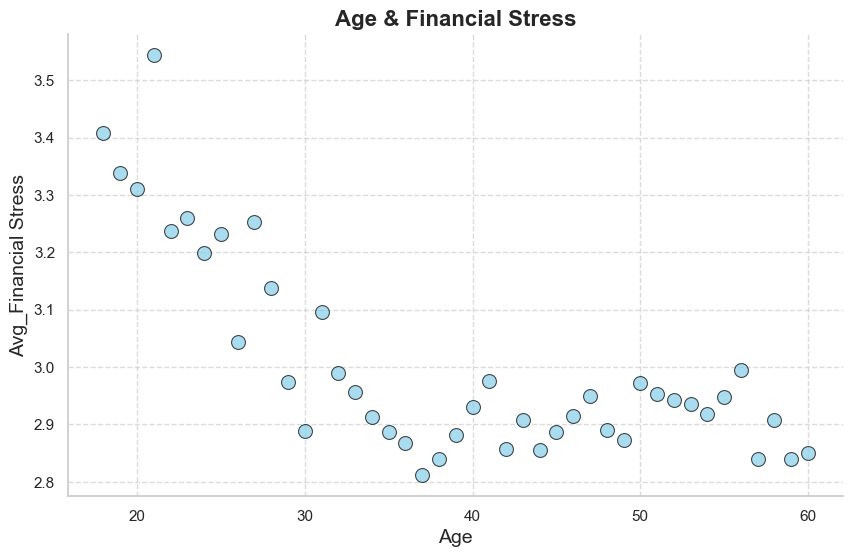

In [62]:
# Scatter plots
List_scatter2 = ['Work Pressure', 'Job Satisfaction','Work/Study Hours', 'Financial Stress']

for each in List_scatter2:
    df2_each = df1_worker_train.groupby('Age')[each].mean().reset_index(name=f'Avg_{each}')
    scatter(df2_each['Age'],df2_each[f'Avg_{each}'],title = f"Age & {each}", xlabel = 'Age', ylabel = f'Avg_{each}')

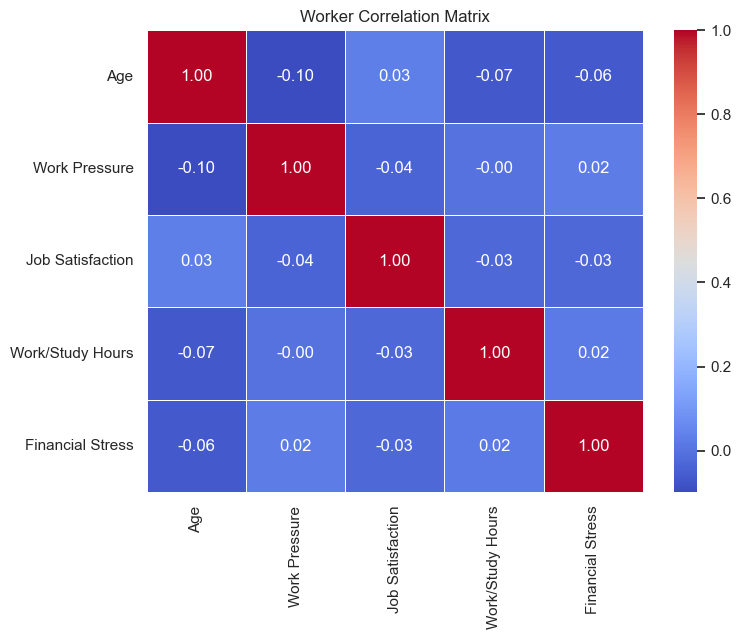

In [64]:
# The sample size of every age group is sufficient for us to give representative descriptions, so this time we won't do any data filtering.
# 'Work Pressure', 'CGPA', 'Job Satisfaction','Work/Study Hours', 'Financial Stress'
data_worker = {
    'Age' : list(df1_worker_train['Age']),
    'Work Pressure' : list(df1_worker_train['Work Pressure']),
    'Job Satisfaction' : list(df1_worker_train['Job Satisfaction']),
    'Work/Study Hours' : list(df1_worker_train['Work/Study Hours']),
    'Financial Stress' : list(df1_worker_train['Financial Stress'])
}

df_corr_worker = pd.DataFrame(data_worker)
corr_relation_worker = df_corr_worker.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_relation_worker, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Worker Correlation Matrix')
plt.show()

### 2.1.3 Variables performance in having depression or not
#### - According to the box charts given, depressed one has higher work pressure, work hours and financial stress, while having less job satisfaction.

/var/folders/g4/mb4r6s4s1djcqrg48p_619x80000gn/T/ipykernel_61339/2769949586.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y=each, data=df, palette='pastel', width=0.6)
/var/folders/g4/mb4r6s4s1djcqrg48p_619x80000gn/T/ipykernel_61339/2769949586.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y=each, data=df, palette='pastel', width=0.6)
/var/folders/g4/mb4r6s4s1djcqrg48p_619x80000gn/T/ipykernel_61339/2769949586.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y=each, data=df, pal

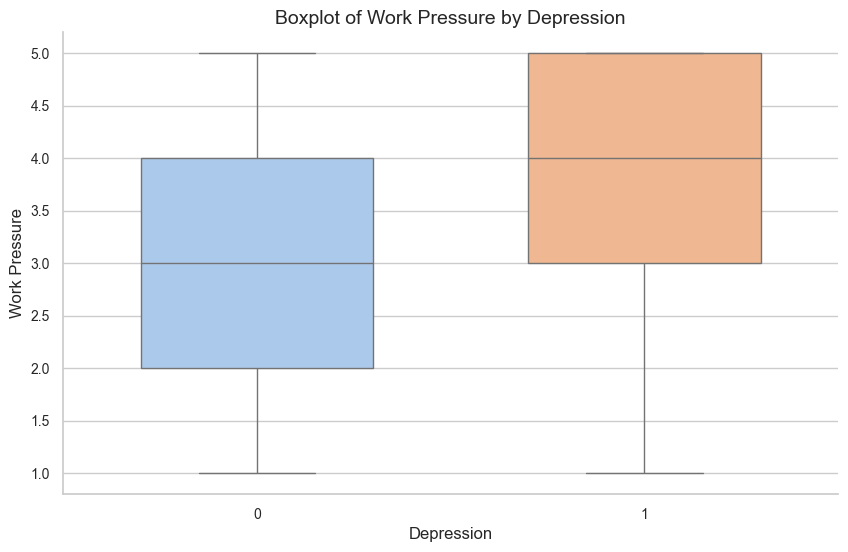

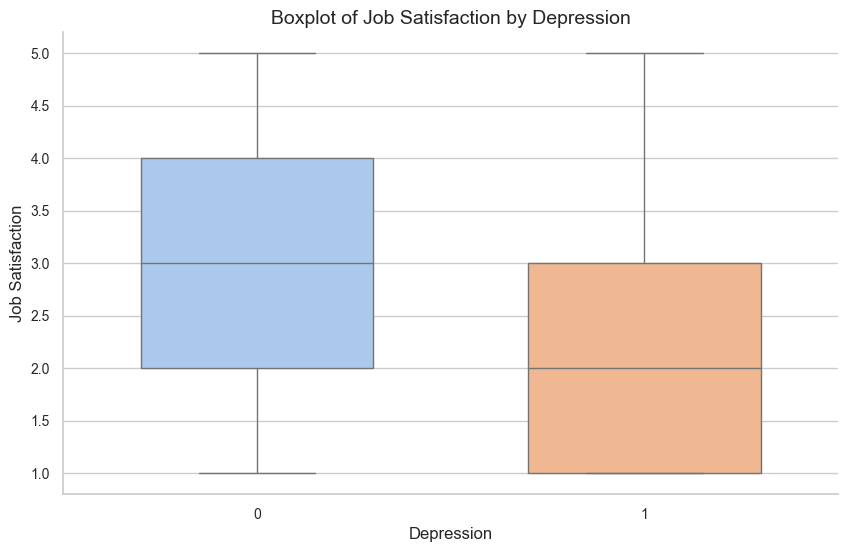

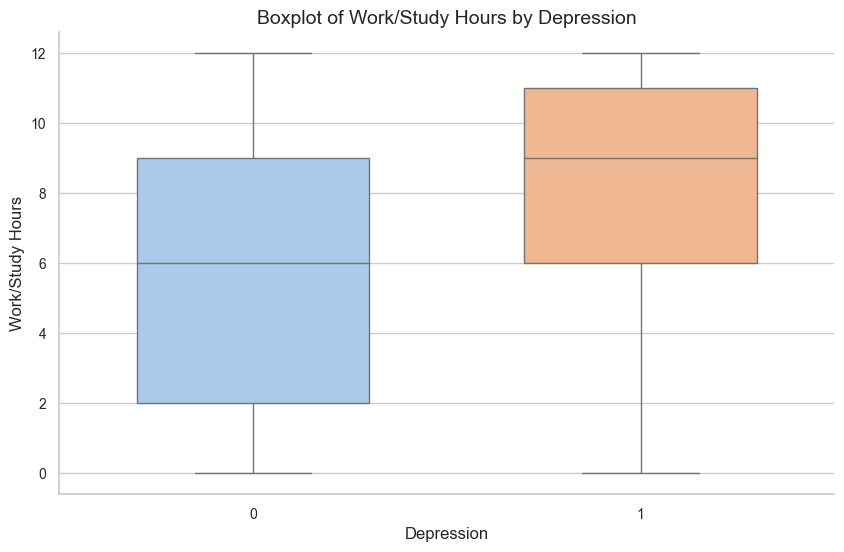

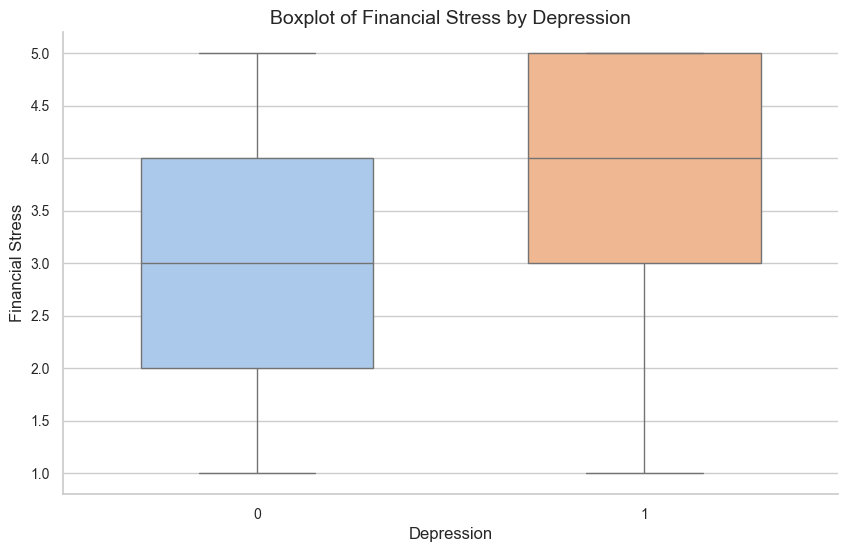

In [67]:
sns.set(style="whitegrid")

List_box2 = ['Work Pressure', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

for each in List_box2:
    data = {
        each: list(df1_worker_train[each]),
        'Depression': list(df1_worker_train['Depression'])
    }
    df = pd.DataFrame(data)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Depression', y=each, data=df, palette='pastel', width=0.6)

    plt.title(f'Boxplot of {each} by Depression', fontsize=14)
    plt.xlabel('Depression', fontsize=12)
    plt.ylabel(each, fontsize=12)
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    sns.despine()


# 3. Model Selection

In [71]:
df1_stu_test = df1_test[df1_test['Working Professional or Student'] == 'Student']
df1_worker_test = df1_test[df1_test['Working Professional or Student'] == 'Working Professional']

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 3.1 Dataset Splitting

In [76]:
df1_stu_train = pd.DataFrame({
    'Age': list(df1_stu_train['Age']),
    'Academic Pressure': list(df1_stu_train['Academic Pressure']),
    'Study Satisfaction': list(df1_stu_train['Study Satisfaction']),
    'Sleep Duration': list(df1_stu_train['Sleep Duration']),
    'Dietary Habits': list(df1_stu_train['Dietary Habits']),
    'Have you ever had suicidal thoughts ?' : list(df1_stu_train['Have you ever had suicidal thoughts ?']),
    'Family History of Mental Illness': list(df1_stu_train['Family History of Mental Illness']),
    'Depression': list(df1_stu_train['Depression'])
})

List_trans1 = ['Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
df_stu_dummies = pd.get_dummies(df1_stu_train, columns=List_trans1)

Stu_X = df_stu_dummies.drop('Depression', axis=1)
Stu_y = df_stu_dummies['Depression']
Stu_X_train, Stu_X_test, Stu_y_train, Stu_y_test = train_test_split(Stu_X, Stu_y, test_size=0.3, random_state=42)

In [78]:
df1_worker_train = pd.DataFrame({
    'Age': list(df1_worker_train['Age']),
    'Work Pressure': list(df1_worker_train['Work Pressure']),
    'Job Satisfaction': list(df1_worker_train['Job Satisfaction']),
    'Sleep Duration': list(df1_worker_train['Sleep Duration']),
    'Dietary Habits': list(df1_worker_train['Dietary Habits']),
    'Have you ever had suicidal thoughts ?' : list(df1_worker_train['Have you ever had suicidal thoughts ?']),
    'Family History of Mental Illness': list(df1_worker_train['Family History of Mental Illness']),
    'Depression': list(df1_worker_train['Depression'])
})

List_trans2 = ['Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
df_worker_dummies = pd.get_dummies(df1_worker_train, columns=List_trans2)

Worker_X = df_worker_dummies.drop('Depression', axis=1)
Worker_y = df_worker_dummies['Depression']
Worker_X_train, Worker_X_test, Worker_y_train, Worker_y_test = train_test_split(Worker_X, Worker_y, test_size=0.3, random_state=42)

## 3.2 Model Definition

### 3.2.1 Logistic Regression

In [86]:
log_stu = LogisticRegression()
log_stu.fit(Stu_X_train, Stu_y_train)

log_stu_y_pred = log_stu.predict(Stu_X_test)
log_stu_accuracy = accuracy_score(Stu_y_test, log_stu_y_pred)

print(f'Accuracy: {log_stu_accuracy:.2f}')

Accuracy: 0.82


In [88]:
log_worker = LogisticRegression()
log_worker.fit(Worker_X_train, Worker_y_train)

log_worker_y_pred = log_worker.predict(Worker_X_test)
log_worker_accuracy = accuracy_score(Worker_y_test, log_worker_y_pred)

print(f'Accuracy: {log_worker_accuracy:.2f}')

Accuracy: 0.96


### 3.2.2 Decision Tree

In [91]:
DT_stu = DecisionTreeClassifier()
DT_stu.fit(Stu_X_train, Stu_y_train)

DT_stu_y_pred = DT_stu.predict(Stu_X_test)
DT_stu_accuracy = accuracy_score(Stu_y_test, DT_stu_y_pred)

print(f'Accuracy: {DT_stu_accuracy:.2f}')

Accuracy: 0.75


In [95]:
DT_worker = DecisionTreeClassifier()
DT_worker.fit(Worker_X_train, Worker_y_train)

DT_worker_y_pred = DT_worker.predict(Worker_X_test)
DT_worker_accuracy = accuracy_score(Worker_y_test, DT_worker_y_pred)

print(f'Accuracy: {DT_worker_accuracy:.2f}')

Accuracy: 0.94


### 3.2.3 Random Forest

In [98]:
RDT_stu = RandomForestClassifier()
RDT_stu.fit(Stu_X_train, Stu_y_train)

RDT_stu_y_pred = RDT_stu.predict(Stu_X_test)
RDT_stu_accuracy = accuracy_score(Stu_y_test, RDT_stu_y_pred)

print(f'Accuracy: {RDT_stu_accuracy:.2f}')

Accuracy: 0.78


In [104]:
RDT_worker = RandomForestClassifier()
RDT_worker.fit(Worker_X_train, Worker_y_train)

RDT_worker_y_pred = RDT_worker.predict(Worker_X_test)
RDT_worker_accuracy = accuracy_score(Worker_y_test, RDT_worker_y_pred)

print(f'Accuracy: {RDT_worker_accuracy:.2f}')

Accuracy: 0.95


### 3.2.4 SVM

In [106]:
SVM_stu = SVC(probability=True)
SVM_stu.fit(Stu_X_train, Stu_y_train)

SVM_stu_y_pred = SVM_stu.predict(Stu_X_test)
SVM_stu_accuracy = accuracy_score(Stu_y_test, SVM_stu_y_pred)

print(f'Accuracy: {SVM_stu_accuracy:.2f}')

Accuracy: 0.82


In [107]:
SVM_worker = SVC(probability=True)
SVM_worker.fit(Worker_X_train, Worker_y_train)

SVM_Worker_y_pred = SVM_worker.predict(Worker_X_test)
SVM_Worker_accuracy = accuracy_score(Worker_y_test, SVM_Worker_y_pred)

print(f'Accuracy: {SVM_Worker_accuracy:.2f}')

Accuracy: 0.95


## 3.2.5 XGBoosting

In [204]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 假设 df1_stu_train 已经定义并进行了one-hot编码

# 准备数据
Stu_X = df_stu_dummies.drop('Depression', axis=1)
Stu_y = df_stu_dummies['Depression']

# 划分训练集和测试集
Stu_X_train, Stu_X_test, Stu_y_train, Stu_y_test = train_test_split(Stu_X, Stu_y, test_size=0.3, random_state=42)

# 创建XGBoost模型
xgb_stu_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')

# 训练模型
xgb_stu_model.fit(Stu_X_train, Stu_y_train)

# 预测
Stu_y_pred = xgb_stu_model.predict(Stu_X_test)

# 计算准确率
xgb_accuracy = accuracy_score(Stu_y_test, Stu_y_pred)

print(f'Accuracy: {xgb_accuracy:.2f}')

Accuracy: 0.82


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:57:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [206]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 假设 df1_worker_train 已经定义并进行了one-hot编码

# 准备数据
Worker_X = df_worker_dummies.drop('Depression', axis=1)
Worker_y = df_worker_dummies['Depression']

# 划分训练集和测试集
Worker_X_train, Worker_X_test, Worker_y_train, Worker_y_test = train_test_split(Worker_X, Worker_y, test_size=0.3, random_state=42)

# 创建XGBoost模型
xgb_worker_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')

# 训练模型
xgb_worker_model.fit(Worker_X_train, Worker_y_train)

# 预测
Worker_y_pred = xgb_worker_model.predict(Worker_X_test)

# 计算准确率
xgb_accuracy = accuracy_score(Worker_y_test, Worker_y_pred)

print(f'Accuracy: {xgb_accuracy:.2f}')

Accuracy: 0.96


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:57:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## 3.3 Model Comparisons

### As we can see from above, logisitcs regression has the highest accuracy in predicting both workers and students' depression. So, we choose logistic regression as the predicting model.

# 4. Data Prediction

## 4.1 Dataframe Defenition

In [112]:
df1_stu_test = pd.DataFrame({
    'id' : list(df1_stu_test['id']),
    'Age': list(df1_stu_test['Age']),
    'Academic Pressure': list(df1_stu_test['Academic Pressure']),
    'Study Satisfaction': list(df1_stu_test['Study Satisfaction']),
    'Sleep Duration': list(df1_stu_test['Sleep Duration']),
    'Dietary Habits': list(df1_stu_test['Dietary Habits']),
    'Have you ever had suicidal thoughts ?' : list(df1_stu_test['Have you ever had suicidal thoughts ?']),
    'Family History of Mental Illness': list(df1_stu_test['Family History of Mental Illness']),
})

df_stu_test_dummies = pd.get_dummies(df1_stu_test, columns=List_trans1)

df_stu_test_dummies = df_stu_test_dummies.reindex(columns=Stu_X.columns, fill_value=0)
Stu_X_train, Stu_X_test, Stu_y_train, Stu_y_test = train_test_split(Stu_X, Stu_y, test_size=0.3, random_state=42)

In [113]:
df1_worker_test = pd.DataFrame({
    'id' : list(df1_worker_test['id']),
    'Age': list(df1_worker_test['Age']),
    'Work Pressure': list(df1_worker_test['Work Pressure']),
    'Job Satisfaction': list(df1_worker_test['Job Satisfaction']),
    'Sleep Duration': list(df1_worker_test['Sleep Duration']),
    'Dietary Habits': list(df1_worker_test['Dietary Habits']),
    'Have you ever had suicidal thoughts ?' : list(df1_worker_test['Have you ever had suicidal thoughts ?']),
    'Family History of Mental Illness': list(df1_worker_test['Family History of Mental Illness']),
})

df_worker_test_dummies = pd.get_dummies(df1_worker_test, columns=List_trans2)

df_worker_test_dummies = df_worker_test_dummies.reindex(columns=Worker_X.columns, fill_value=0)
Worker_X_train, Worker_X_test, Worker_y_train, Worker_y_test = train_test_split(Worker_X, Worker_y, test_size=0.3, random_state=42)

## 4.2 Running Model

In [135]:
predictions_stu = SVM_stu.predict(df_stu_test_dummies)

df1_stu_test['Depression'] = predictions_stu

print(df1_stu_test)

           id   Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0      140703  23.0                5.0                 1.0  More than 8 hours   
1      140708  21.0                1.0                 3.0  Less than 5 hours   
2      140719  28.0                5.0                 3.0          7-8 hours   
3      140720  26.0                3.0                 5.0  More than 8 hours   
4      140721  32.0                3.0                 1.0  Less than 5 hours   
...       ...   ...                ...                 ...                ...   
18767  234485  33.0                5.0                 2.0          7-8 hours   
18768  234490  19.0                4.0                 3.0          7-8 hours   
18769  234493  29.0                2.0                 5.0  More than 8 hours   
18770  234494  33.0                1.0                 2.0  More than 8 hours   
18771  234497  24.0                1.0                 4.0          7-8 hours   

      Dietary Habits Have y

In [136]:
predictions_worker = SVM_worker.predict(df_worker_test_dummies)

df1_worker_test['Depression'] = predictions_worker

print(df1_worker_test)

           id   Age  Work Pressure  Job Satisfaction     Sleep Duration  \
0      140700  53.0            2.0               5.0  Less than 5 hours   
1      140701  58.0            2.0               4.0  Less than 5 hours   
2      140702  53.0            4.0               1.0          7-8 hours   
3      140704  47.0            5.0               5.0          7-8 hours   
4      140705  29.0            2.0               3.0  More than 8 hours   
...       ...   ...            ...               ...                ...   
75023  234492  23.0            2.0               3.0  Less than 5 hours   
75024  234495  49.0            3.0               5.0  Less than 5 hours   
75025  234496  29.0            5.0               1.0          7-8 hours   
75026  234498  23.0            4.0               2.0          5-6 hours   
75027  234499  43.0            5.0               2.0  More than 8 hours   

      Dietary Habits Have you ever had suicidal thoughts ?  \
0           Moderate                 

## 4.3 Output Result

In [141]:
df1_worker_test.to_csv('1.csv',index=False)
df1_stu_test.to_csv('2.csv',index=False)

In [208]:
predictions_stu = xgb_stu_model.predict(df_stu_test_dummies)

df1_stu_test['Depression'] = predictions_stu

print(df1_stu_test)

           id   Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0      140703  23.0                5.0                 1.0  More than 8 hours   
1      140708  21.0                1.0                 3.0  Less than 5 hours   
2      140719  28.0                5.0                 3.0          7-8 hours   
3      140720  26.0                3.0                 5.0  More than 8 hours   
4      140721  32.0                3.0                 1.0  Less than 5 hours   
...       ...   ...                ...                 ...                ...   
18767  234485  33.0                5.0                 2.0          7-8 hours   
18768  234490  19.0                4.0                 3.0          7-8 hours   
18769  234493  29.0                2.0                 5.0  More than 8 hours   
18770  234494  33.0                1.0                 2.0  More than 8 hours   
18771  234497  24.0                1.0                 4.0          7-8 hours   

      Dietary Habits Have y

In [210]:
predictions_worker = xgb_worker_model.predict(df_worker_test_dummies)

df1_worker_test['Depression'] = predictions_worker

print(df1_worker_test)

           id   Age  Work Pressure  Job Satisfaction     Sleep Duration  \
0      140700  53.0            2.0               5.0  Less than 5 hours   
1      140701  58.0            2.0               4.0  Less than 5 hours   
2      140702  53.0            4.0               1.0          7-8 hours   
3      140704  47.0            5.0               5.0          7-8 hours   
4      140705  29.0            2.0               3.0  More than 8 hours   
...       ...   ...            ...               ...                ...   
75023  234492  23.0            2.0               3.0  Less than 5 hours   
75024  234495  49.0            3.0               5.0  Less than 5 hours   
75025  234496  29.0            5.0               1.0          7-8 hours   
75026  234498  23.0            4.0               2.0          5-6 hours   
75027  234499  43.0            5.0               2.0  More than 8 hours   

      Dietary Habits Have you ever had suicidal thoughts ?  \
0           Moderate                 

In [212]:
df1_worker_test.to_csv('3.csv',index=False)
df1_stu_test.to_csv('4.csv',index=False)